# Language Models for Information Retrieval - Python Tutorials

## Overview

This tutorial series teaches language models for information retrieval through hands-on Python implementations. Each tutorial focuses on key concepts from the lecture slides by Jaime Arguello's "Language Models for Information Retrieval" and provides practical code to understand and apply these concepts.

## Tutorials

### Tutorial 1: Introduction to Language Models
- Basic probability concepts and distributions
- Unigram language model implementation
- Calculating sequence probabilities
- Visualizing word distributions

### Tutorial 2: Document Language Models for IR
- Creating language models from documents
- Implementing the Query-Likelihood Retrieval Model
- Understanding document scoring
- Basic retrieval without smoothing

### Tutorial 3: Smoothing Techniques for Language Models
- Understanding the zero-probability problem
- Implementing different smoothing methods:
  - Laplace (add-one) smoothing
  - Linear interpolation smoothing
  - Dirichlet smoothing
  - Jelinek-Mercer smoothing
- Visualizing the effect of smoothing parameters
- The IDF effect in smoothing

### Tutorial 4: Query-Likelihood Model with Extensions
- Implementing document priors
- Pseudo-relevance feedback for query expansion
- Combining priors with query expansion
- Analysis of when and why these techniques work

## Key Concepts Covered

1. **Language Model Fundamentals**
   - Probability distributions over words
   - Unigram independence assumption
   - Estimating models from text

2. **Query-Likelihood Model**
   - Scoring documents by P(Query|Document)
   - Handling multiple query terms
   - Ranking mechanism

3. **Smoothing Techniques**
   - Addressing the zero-probability problem
   - Linear interpolation and IDF-like effects
   - Impact of smoothing parameters

4. **Advanced Techniques**
   - Document priors (length, recency, authority)
   - Pseudo-relevance feedback
   - Query expansion

## Prerequisites

These tutorials assume:
- Basic Python programming knowledge
- Familiarity with probability concepts
- Understanding of basic information retrieval principles

## Usage

Each tutorial can be run independently, though they build on concepts from previous tutorials. The code includes detailed comments and print statements to help understand the concepts and calculations involved.

## Learning Path

1. Start with Tutorial 1 to understand the foundation of language models
2. Move to Tutorial 2 to see how these models apply to document retrieval
3. Tutorial 3 explains the critical concept of smoothing
4. Tutorial 4 explores advanced techniques that build on the base model

## Additional Resources

For deeper understanding of these concepts, refer to:
- "Statistical Language Models for Information Retrieval" by ChengXiang Zhai
- "Introduction to Information Retrieval" by Manning, Raghavan, and Schütze
- The original lecture slides by Jaime Arguello

# 1. Introduction to Language Models and Probability Distributions

PART 1: Understanding Probability Distributions
--------------------------------------------------
Probabilities for each color:
P(red) = 0.5
P(blue) = 0.25
P(orange) = 0.25

Probabilities for different sequences:
P(['orange']) = 0.25
P(['red', 'blue']) = 0.125
P(['orange', 'orange', 'orange']) = 0.015625

PART 2: Unigram Language Model
--------------------------------------------------
Top 10 most frequent words in our corpus:
a: 9 occurrences, P(a) = 0.0900
to: 6 occurrences, P(to) = 0.0600
the: 3 occurrences, P(the) = 0.0300
in: 3 occurrences, P(in) = 0.0300
for: 3 occurrences, P(for) = 0.0300
he: 3 occurrences, P(he) = 0.0300
his: 3 occurrences, P(his) = 0.0300
rocky: 2 occurrences, P(rocky) = 0.0200
struggling: 2 occurrences, P(struggling) = 0.0200
as: 2 occurrences, P(as) = 0.0200

Probabilities of different word sequences:
P("rocky is a boxer") = 0.00000018
P("a boxer is a nobody") = 0.00000001
P("apollo creed is a boxer") = 0.00000000
P("the") = 0.03000000

A visualization of t

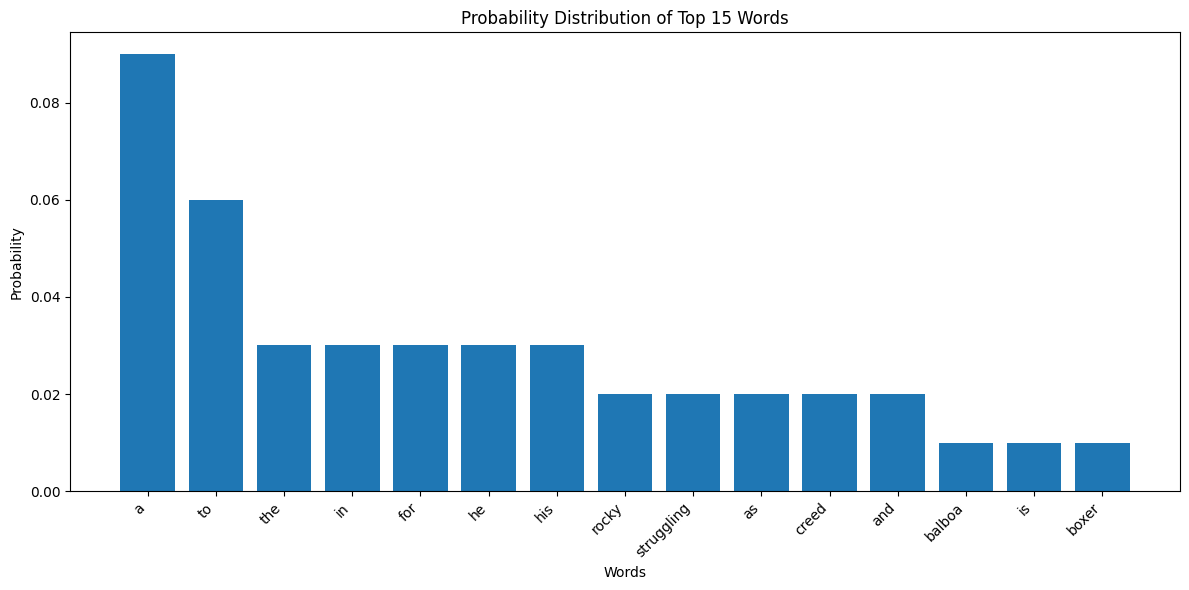

In [1]:
"""
# Language Models for Information Retrieval - Tutorial 1
# Introduction to Language Models and Probability Distributions

This tutorial demonstrates the basic concepts of language models, particularly
unigram language models, and how we can use them to assign probabilities to word sequences.
"""

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Part 1: Understanding Discrete Probability Distributions

# Let's create a simple analogy with colored balls in a bag
# as shown in the lecture slides
def simulate_ball_drawing():
    # Our bag contains 20 balls: 10 red, 5 blue, 5 orange
    bag = ['red'] * 10 + ['blue'] * 5 + ['orange'] * 5

    # Calculate the probabilities
    total_balls = len(bag)
    probabilities = {}
    for color, count in Counter(bag).items():
        probabilities[color] = count / total_balls

    print("Probabilities for each color:")
    for color, prob in probabilities.items():
        print(f"P({color}) = {prob}")

    # Drawing sequences of balls and calculating their probabilities
    # Assume we put the ball back after each draw (with replacement)
    print("\nProbabilities for different sequences:")

    # Example 1: Drawing a single orange ball
    seq1 = ['orange']
    prob1 = probabilities['orange']
    print(f"P({seq1}) = {prob1}")

    # Example 2: Drawing red, then blue
    seq2 = ['red', 'blue']
    prob2 = probabilities['red'] * probabilities['blue']
    print(f"P({seq2}) = {prob2}")

    # Example 3: Drawing three orange balls in a row
    seq3 = ['orange', 'orange', 'orange']
    prob3 = probabilities['orange'] ** 3
    print(f"P({seq3}) = {prob3}")

    return probabilities

# Part 2: Creating a Simple Unigram Language Model from Text

def create_unigram_model(text):
    """
    Creates a unigram language model from the given text.
    Returns a dictionary of word probabilities.
    """
    # Tokenize the text into words (simple splitting by space)
    words = text.lower().split()

    # Count the occurrences of each word
    word_counts = Counter(words)
    total_words = len(words)

    # Calculate the probability of each word
    word_probabilities = {}
    for word, count in word_counts.items():
        word_probabilities[word] = count / total_words

    return word_probabilities, words, word_counts

def calculate_sequence_probability(sequence, language_model):
    """
    Calculates the probability of a sequence of words using the language model.
    """
    # Split the sequence into words
    words = sequence.lower().split()

    # Calculate the probability by multiplying individual word probabilities
    probability = 1.0
    for word in words:
        if word in language_model:
            probability *= language_model[word]
        else:
            # If the word is not in our vocabulary, probability becomes 0
            probability = 0.0
            break

    return probability

# Example usage
if __name__ == "__main__":
    print("PART 1: Understanding Probability Distributions")
    print("-" * 50)
    ball_probabilities = simulate_ball_drawing()

    print("\nPART 2: Unigram Language Model")
    print("-" * 50)

    # Sample text corpus (similar to the Rocky movie example in the slides)
    rocky_corpus = """
    Rocky Balboa is a struggling boxer trying to make the big time.
    Working in a meat factory in Philadelphia for a pittance, he also earns extra cash as a debt collector.
    When heavyweight champion Apollo Creed visits Philadelphia, his managers want to set up an exhibition match
    between Creed and a struggling boxer, touting the fight as a chance for a nobody to become a somebody.
    Rocky still boxes every once in a while to keep his boxing skills sharp, and his ex-trainer, Mickey,
    believes he could've made it to the top if he was willing to work for it.
    """

    # Create a unigram language model
    language_model, words, word_counts = create_unigram_model(rocky_corpus)

    # Print the top 10 most frequent words and their probabilities
    print("Top 10 most frequent words in our corpus:")
    for word, count in word_counts.most_common(10):
        print(f"{word}: {count} occurrences, P({word}) = {language_model[word]:.4f}")

    # Calculate the probability of some word sequences
    sequences = [
        "rocky is a boxer",
        "a boxer is a nobody",
        "apollo creed is a boxer",
        "the"  # Single common word
    ]

    print("\nProbabilities of different word sequences:")
    for seq in sequences:
        prob = calculate_sequence_probability(seq, language_model)
        print(f'P("{seq}") = {prob:.8f}')

    # Visualize the word frequency distribution
    top_words = [word for word, _ in word_counts.most_common(15)]
    top_probs = [language_model[word] for word in top_words]

    plt.figure(figsize=(12, 6))
    plt.bar(top_words, top_probs)
    plt.title('Probability Distribution of Top 15 Words')
    plt.xlabel('Words')
    plt.ylabel('Probability')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('unigram_distribution.png')
    print("\nA visualization of the word probability distribution has been saved as 'unigram_distribution.png'")

# 2. Document Language Models and Query Likelihood

In [2]:
"""
# Language Models for Information Retrieval - Tutorial 2
# Document Language Models and Query Likelihood

This tutorial demonstrates how to create language models for documents
and implement the Query-Likelihood Retrieval Model for ranking documents.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

class DocumentCollection:
    """A class to represent a collection of documents and their language models."""

    def __init__(self):
        self.documents = []
        self.doc_language_models = []
        self.collection_language_model = {}
        self.vocab = set()

    def add_document(self, doc_id, content):
        """Add a document to the collection."""
        self.documents.append({
            'id': doc_id,
            'content': content,
            'terms': content.lower().split()
        })
        # Update vocabulary
        self.vocab.update(content.lower().split())

    def build_language_models(self):
        """Build the language model for each document and the collection."""
        all_terms = []

        # Build individual document language models
        for doc in self.documents:
            term_counts = Counter(doc['terms'])
            total_terms = len(doc['terms'])

            # Calculate probability for each term in the document
            lm = {term: count/total_terms for term, count in term_counts.items()}
            self.doc_language_models.append({
                'id': doc['id'],
                'model': lm,
                'term_counts': term_counts,
                'total_terms': total_terms
            })

            # Collect all terms for collection language model
            all_terms.extend(doc['terms'])

        # Build collection language model
        collection_term_counts = Counter(all_terms)
        total_collection_terms = len(all_terms)

        self.collection_language_model = {
            term: count/total_collection_terms
            for term, count in collection_term_counts.items()
        }

        # Print statistics
        print(f"Collection Statistics:")
        print(f"- Total documents: {len(self.documents)}")
        print(f"- Vocabulary size: {len(self.vocab)}")
        print(f"- Total terms in collection: {total_collection_terms}")

    def query_likelihood(self, query, alpha=1.0):
        """
        Rank documents using the query-likelihood model.
        alpha=1.0 means no smoothing (pure maximum likelihood)
        """
        # Split query into terms
        query_terms = query.lower().split()

        results = []

        for doc_lm in self.doc_language_models:
            # Calculate query likelihood score
            score = 1.0
            doc_id = doc_lm['id']

            # Show term probabilities for transparency
            term_probs = {}

            for term in query_terms:
                # If term exists in document, use its probability
                if term in doc_lm['model']:
                    term_prob = doc_lm['model'][term]
                else:
                    # Term doesn't exist in document, score becomes 0 (no smoothing)
                    term_prob = 0.0

                term_probs[term] = term_prob
                score *= term_prob

            results.append({
                'doc_id': doc_id,
                'score': score,
                'term_probs': term_probs
            })

        # Sort results by score in descending order
        results.sort(key=lambda x: x['score'], reverse=True)
        return results

    def query_likelihood_with_smoothing(self, query, alpha=0.5):
        """
        Rank documents using the query-likelihood model with linear interpolation smoothing.
        alpha controls the mix between document and collection probabilities:
        - alpha=1.0: pure document model (no smoothing)
        - alpha=0.0: pure collection model
        - alpha=0.5: equal weight to document and collection models
        """
        # Split query into terms
        query_terms = query.lower().split()

        results = []

        for doc_lm in self.doc_language_models:
            # Calculate query likelihood score
            score = 1.0
            doc_id = doc_lm['id']

            # Track individual term probabilities for explanation
            term_probs = {}

            for term in query_terms:
                # Get document probability (0 if term is not in document)
                doc_prob = doc_lm['model'].get(term, 0.0)

                # Get collection probability (0 if term is not in collection)
                coll_prob = self.collection_language_model.get(term, 0.0)

                # Apply linear interpolation smoothing
                smoothed_prob = alpha * doc_prob + (1 - alpha) * coll_prob

                term_probs[term] = {
                    'doc_prob': doc_prob,
                    'coll_prob': coll_prob,
                    'smoothed_prob': smoothed_prob
                }

                score *= smoothed_prob

            results.append({
                'doc_id': doc_id,
                'score': score,
                'term_probs': term_probs
            })

        # Sort results by score in descending order
        results.sort(key=lambda x: x['score'], reverse=True)
        return results

# Example usage
if __name__ == "__main__":
    # Create a small collection of documents
    collection = DocumentCollection()

    # Add some movie-related documents (from slides example)
    collection.add_document("D1", """
    Rocky Balboa is a struggling boxer trying to make the big time.
    Working in a meat factory in Philadelphia for a pittance, he also earns extra cash as a debt collector.
    When heavyweight champion Apollo Creed visits Philadelphia, his managers want to set up an exhibition match
    between Creed and a struggling boxer, touting the fight as a chance for a nobody to become a somebody.
    """)

    collection.add_document("D2", """
    The Godfather is a 1972 American crime film directed by Francis Ford Coppola and produced by Albert S. Ruddy,
    based on Mario Puzo's best-selling novel of the same name. The film stars Marlon Brando and Al Pacino as the
    leaders of a fictional New York crime family.
    """)

    collection.add_document("D3", """
    Apollo 13 is a 1995 American space docudrama film directed by Ron Howard and starring Tom Hanks,
    Kevin Bacon, Bill Paxton, Gary Sinise, and Ed Harris. The film depicts the aborted 1970 Apollo 13 lunar mission
    and is an adaptation of the 1994 book Lost Moon by astronaut Jim Lovell and Jeffrey Kluger.
    """)

    # Build the language models
    collection.build_language_models()

    # Search queries to try
    queries = [
        "Rocky Balboa boxer",
        "Apollo Creed",
        "Apollo",
        "New York crime"
    ]

    # Try no smoothing first
    print("\n--- Query Likelihood Model (No Smoothing) ---")
    for query in queries:
        print(f"\nQuery: '{query}'")
        results = collection.query_likelihood(query)

        for i, result in enumerate(results):
            print(f"{i+1}. Document {result['doc_id']} - Score: {result['score']:.8f}")
            print("   Term probabilities:", result['term_probs'])

    # Try with smoothing
    print("\n--- Query Likelihood Model (With Linear Interpolation Smoothing, α=0.5) ---")
    for query in queries:
        print(f"\nQuery: '{query}'")
        results = collection.query_likelihood_with_smoothing(query, alpha=0.5)

        for i, result in enumerate(results):
            print(f"{i+1}. Document {result['doc_id']} - Score: {result['score']:.8f}")
            # Print detailed smoothed probabilities for each term
            print("   Term probabilities:")
            for term, probs in result['term_probs'].items():
                print(f"     - {term}: doc_prob={probs['doc_prob']:.4f}, coll_prob={probs['coll_prob']:.4f}, smoothed={probs['smoothed_prob']:.4f}")

    # Demonstrating effect of alpha parameter
    print("\n--- Effect of Smoothing Parameter (α) ---")
    query = "Apollo Creed"
    print(f"Query: '{query}'")

    for alpha in [0.0, 0.3, 0.5, 0.7, 1.0]:
        print(f"\nWith α = {alpha}:")
        results = collection.query_likelihood_with_smoothing(query, alpha=alpha)

        for i, result in enumerate(results):
            print(f"{i+1}. Document {result['doc_id']} - Score: {result['score']:.8f}")

Collection Statistics:
- Total documents: 3
- Vocabulary size: 116
- Total terms in collection: 166

--- Query Likelihood Model (No Smoothing) ---

Query: 'Rocky Balboa boxer'
1. Document D1 - Score: 0.00000348
   Term probabilities: {'rocky': 0.015151515151515152, 'balboa': 0.015151515151515152, 'boxer': 0.015151515151515152}
2. Document D2 - Score: 0.00000000
   Term probabilities: {'rocky': 0.0, 'balboa': 0.0, 'boxer': 0.0}
3. Document D3 - Score: 0.00000000
   Term probabilities: {'rocky': 0.0, 'balboa': 0.0, 'boxer': 0.0}

Query: 'Apollo Creed'
1. Document D1 - Score: 0.00045914
   Term probabilities: {'apollo': 0.015151515151515152, 'creed': 0.030303030303030304}
2. Document D2 - Score: 0.00000000
   Term probabilities: {'apollo': 0.0, 'creed': 0.0}
3. Document D3 - Score: 0.00000000
   Term probabilities: {'apollo': 0.03773584905660377, 'creed': 0.0}

Query: 'Apollo'
1. Document D3 - Score: 0.03773585
   Term probabilities: {'apollo': 0.03773584905660377}
2. Document D1 - Score:

# 3. Smoothing Techniques for Language Models

Vocabulary size: 150
Collection size: 223 terms

--- Effect of Smoothing on Term Probabilities ---

Document D1:
  Term: 'apollo'
    - ML Estimate: 0.015152
    - Laplace: 0.009259
    - Linear Interpolation: 0.014302
    - Dirichlet: 0.013507
  Term: 'boxing'
    - ML Estimate: 0.000000
    - Laplace: 0.004630
    - Linear Interpolation: 0.006726
    - Dirichlet: 0.013023
  Term: 'astronaut'
    - ML Estimate: 0.000000
    - Laplace: 0.004630
    - Linear Interpolation: 0.002242
    - Dirichlet: 0.004341
  Term: 'nonexistent'
    - ML Estimate: 0.000000
    - Laplace: 0.004630
    - Linear Interpolation: 0.000000
    - Dirichlet: 0.000000

Document D3:
  Term: 'apollo'
    - ML Estimate: 0.037736
    - Laplace: 0.014778
    - Linear Interpolation: 0.025594
    - Dirichlet: 0.014080
  Term: 'boxing'
    - ML Estimate: 0.000000
    - Laplace: 0.004926
    - Linear Interpolation: 0.006726
    - Dirichlet: 0.013106
  Term: 'astronaut'
    - ML Estimate: 0.018868
    - Laplace: 0.009852
 

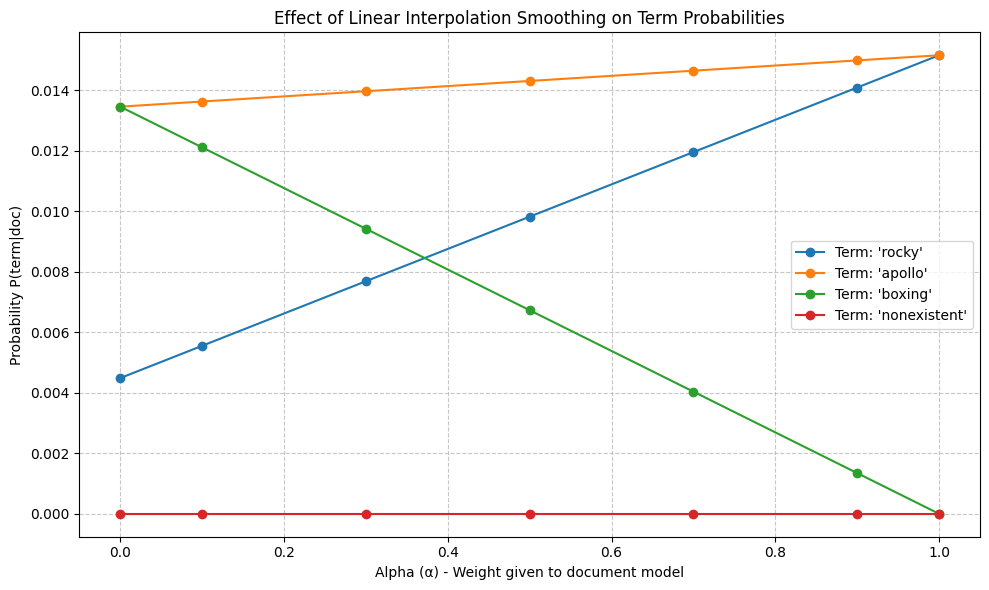

In [ ]:
"""
# Language Models for Information Retrieval - Tutorial 3
# Smoothing Techniques for Language Models

This tutorial explores different smoothing methods for language models
and demonstrates their impact on information retrieval.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math

class SmoothingLM:
    """Implementation of various smoothing techniques for language models."""

    def __init__(self):
        self.documents = []
        self.doc_language_models = {}
        self.collection_language_model = {}
        self.vocabulary = set()
        self.collection_size = 0

    def add_document(self, doc_id, content):
        """Add a document to the collection."""
        # Simple tokenization (just splitting by whitespace)
        terms = content.lower().split()

        self.documents.append({
            'id': doc_id,
            'content': content,
            'terms': terms,
            'length': len(terms)
        })

        # Update vocabulary
        self.vocabulary.update(terms)

        # Update collection size
        self.collection_size += len(terms)

    def build_models(self):
        """Build all language models."""
        # First, build the collection language model
        all_terms = []
        for doc in self.documents:
            all_terms.extend(doc['terms'])

        term_counts = Counter(all_terms)
        self.collection_language_model = {
            term: count / self.collection_size
            for term, count in term_counts.items()
        }

        # Then build individual document models
        for doc in self.documents:
            doc_id = doc['id']
            doc_terms = doc['terms']
            term_counts = Counter(doc_terms)

            # Create raw maximum likelihood model (no smoothing)
            self.doc_language_models[doc_id] = {
                'ml_model': {term: count / doc['length'] for term, count in term_counts.items()},
                'term_counts': term_counts,
                'length': doc['length']
            }

    def get_ml_probability(self, term, doc_id):
        """Get maximum likelihood probability P(term|doc)."""
        doc_model = self.doc_language_models[doc_id]
        return doc_model['ml_model'].get(term, 0.0)

    def get_collection_probability(self, term):
        """Get collection probability P(term|C)."""
        return self.collection_language_model.get(term, 0.0)

    def laplace_smoothing(self, term, doc_id, k=1):
        """
        Apply Laplace (add-k) smoothing.
        P(t|d) = (tf_t,d + k) / (|d| + k*|V|)
        """
        doc_model = self.doc_language_models[doc_id]
        term_count = doc_model['term_counts'].get(term, 0)
        doc_length = doc_model['length']
        vocabulary_size = len(self.vocabulary)

        return (term_count + k) / (doc_length + k * vocabulary_size)

    def linear_interpolation(self, term, doc_id, alpha=0.5):
        """
        Apply linear interpolation smoothing.
        P(t|d) = α*P_ml(t|d) + (1-α)*P(t|C)
        """
        doc_prob = self.get_ml_probability(term, doc_id)
        collection_prob = self.get_collection_probability(term)

        return alpha * doc_prob + (1 - alpha) * collection_prob

    def dirichlet_smoothing(self, term, doc_id, mu=2000):
        """
        Apply Dirichlet smoothing.
        P(t|d) = (tf_t,d + μ*P(t|C)) / (|d| + μ)
        """
        doc_model = self.doc_language_models[doc_id]
        term_count = doc_model['term_counts'].get(term, 0)
        doc_length = doc_model['length']
        collection_prob = self.get_collection_probability(term)

        return (term_count + mu * collection_prob) / (doc_length + mu)

    def jelinek_mercer_smoothing(self, term, doc_id, lambda_param=0.5):
        """
        Apply Jelinek-Mercer smoothing (equivalent to linear interpolation).
        P(t|d) = λ*P_ml(t|d) + (1-λ)*P(t|C)
        """
        # This is functionally equivalent to linear_interpolation
        return self.linear_interpolation(term, doc_id, alpha=lambda_param)

    def score_query(self, query, doc_id, smoothing_method='linear', **kwargs):
        """
        Score a query for a document using specified smoothing method.
        """
        query_terms = query.lower().split()
        score = 0  # We'll use log probabilities to avoid underflow

        term_probs = {}

        for term in query_terms:
            # Get term probability based on smoothing method
            if smoothing_method == 'none':
                prob = self.get_ml_probability(term, doc_id)
            elif smoothing_method == 'laplace':
                k = kwargs.get('k', 1)
                prob = self.laplace_smoothing(term, doc_id, k)
            elif smoothing_method == 'linear':
                alpha = kwargs.get('alpha', 0.5)
                prob = self.linear_interpolation(term, doc_id, alpha)
            elif smoothing_method == 'dirichlet':
                mu = kwargs.get('mu', 2000)
                prob = self.dirichlet_smoothing(term, doc_id, mu)
            elif smoothing_method == 'jelinek-mercer':
                lambda_param = kwargs.get('lambda_param', 0.5)
                prob = self.jelinek_mercer_smoothing(term, doc_id, lambda_param)
            else:
                raise ValueError(f"Unknown smoothing method: {smoothing_method}")

            # Handle zero probabilities
            if prob > 0:
                score += math.log(prob)
                term_probs[term] = prob
            else:
                # If any probability is zero, whole score becomes negative infinity
                # unless we're using a smoothing method that prevents zeros
                if smoothing_method == 'none':
                    score = float('-inf')
                    term_probs[term] = 0
                    break
                else:
                    # This shouldn't happen with proper smoothing, but just in case
                    score += math.log(1e-10)  # Small value instead of zero
                    term_probs[term] = 1e-10

        return {
            'score': score,
            'original_score': math.exp(score) if score > float('-inf') else 0,
            'term_probs': term_probs
        }

    def search(self, query, smoothing_method='linear', **kwargs):
        """
        Search all documents for a query using the specified smoothing method.
        """
        results = []

        for doc in self.documents:
            doc_id = doc['id']
            score_info = self.score_query(query, doc_id, smoothing_method, **kwargs)

            results.append({
                'doc_id': doc_id,
                'score': score_info['score'],
                'original_score': score_info['original_score'],
                'term_probs': score_info['term_probs']
            })

        # Sort by score (log probability) in descending order
        results.sort(key=lambda x: x['score'], reverse=True)
        return results

    def compare_smoothing_methods(self, query):
        """
        Compare different smoothing methods for a given query.
        """
        # List of smoothing methods to compare
        methods = [
            {'name': 'Maximum Likelihood (No Smoothing)', 'method': 'none'},
            {'name': 'Laplace (Add-One)', 'method': 'laplace', 'k': 1},
            {'name': 'Linear Interpolation (α=0.5)', 'method': 'linear', 'alpha': 0.5},
            {'name': 'Dirichlet (μ=2000)', 'method': 'dirichlet', 'mu': 2000},
            {'name': 'Jelinek-Mercer (λ=0.5)', 'method': 'jelinek-mercer', 'lambda_param': 0.5}
        ]

        # Store results for each method
        all_results = {}

        for method_info in methods:
            method_name = method_info['name']
            method = method_info['method']
            kwargs = {k: v for k, v in method_info.items() if k not in ['name', 'method']}

            results = self.search(query, method, **kwargs)
            all_results[method_name] = results

        return all_results

# Example usage
if __name__ == "__main__":
    # Create a language model with smoothing
    lm = SmoothingLM()

    # Add some movie-related documents
    lm.add_document("D1", """
    Rocky Balboa is a struggling boxer trying to make the big time.
    Working in a meat factory in Philadelphia for a pittance, he also earns extra cash as a debt collector.
    When heavyweight champion Apollo Creed visits Philadelphia, his managers want to set up an exhibition match
    between Creed and a struggling boxer, touting the fight as a chance for a nobody to become a somebody.
    """)

    lm.add_document("D2", """
    The Godfather is a 1972 American crime film directed by Francis Ford Coppola and produced by Albert S. Ruddy,
    based on Mario Puzo's best-selling novel of the same name. The film stars Marlon Brando and Al Pacino as the
    leaders of a fictional New York crime family.
    """)

    lm.add_document("D3", """
    Apollo 13 is a 1995 American space docudrama film directed by Ron Howard and starring Tom Hanks,
    Kevin Bacon, Bill Paxton, Gary Sinise, and Ed Harris. The film depicts the aborted 1970 Apollo 13 lunar mission
    and is an adaptation of the 1994 book Lost Moon by astronaut Jim Lovell and Jeffrey Kluger.
    """)

    lm.add_document("D4", """
    Boxing is a combat sport in which two people, usually wearing protective gloves and other protective equipment
    such as hand wraps and mouthguards, throw punches at each other for a predetermined amount of time in a boxing ring.
    Amateur boxing is both an Olympic and Commonwealth Games sport and is a standard fixture in most international games.
    """)

    # Build the language models
    lm.build_models()

    print("Vocabulary size:", len(lm.vocabulary))
    print("Collection size:", lm.collection_size, "terms")

    # Example 1: Show the effect of smoothing on a single term probability
    print("\n--- Effect of Smoothing on Term Probabilities ---")
    terms = ['apollo', 'boxing', 'astronaut', 'nonexistent']

    for doc_id in ["D1", "D3", "D4"]:
        print(f"\nDocument {doc_id}:")
        for term in terms:
            ml_prob = lm.get_ml_probability(term, doc_id)
            laplace_prob = lm.laplace_smoothing(term, doc_id)
            linear_prob = lm.linear_interpolation(term, doc_id)
            dirichlet_prob = lm.dirichlet_smoothing(term, doc_id)

            print(f"  Term: '{term}'")
            print(f"    - ML Estimate: {ml_prob:.6f}")
            print(f"    - Laplace: {laplace_prob:.6f}")
            print(f"    - Linear Interpolation: {linear_prob:.6f}")
            print(f"    - Dirichlet: {dirichlet_prob:.6f}")

    # Example 2: Query ranking with different smoothing methods
    print("\n--- Query Ranking with Different Smoothing Methods ---")

    queries = [
        "apollo boxing",
        "nonexistent term",
        "rocky apollo"
    ]

    for query in queries:
        print(f"\nQuery: '{query}'")
        results = lm.compare_smoothing_methods(query)

        for method, method_results in results.items():
            print(f"\n  {method}:")
            for i, result in enumerate(method_results):
                if i < 3:  # Show top 3 results
                    print(f"    {i+1}. Doc {result['doc_id']} - Score: {result['score']:.4f} (Original: {result['original_score']:.10f})")
                    # Show first two term probabilities for clarity
                    term_probs = list(result['term_probs'].items())[:2]
                    if term_probs:
                        print(f"       Term probabilities: {term_probs}")

    # Example 3: The zero probability problem
    print("\n--- The Zero Probability Problem ---")

    # A query with terms not in all documents
    query = "apollo directed"

    print(f"Query: '{query}'")
    print("\nWithout smoothing:")
    results = lm.search(query, smoothing_method='none')
    for i, result in enumerate(results):
        print(f"  {i+1}. Doc {result['doc_id']} - Score: {result['score']}")
        print(f"     Original score: {result['original_score']}")
        print(f"     Term probabilities: {result['term_probs']}")

    print("\nWith linear interpolation smoothing (α=0.5):")
    results = lm.search(query, smoothing_method='linear', alpha=0.5)
    for i, result in enumerate(results):
        print(f"  {i+1}. Doc {result['doc_id']} - Score: {result['score']:.4f}")
        print(f"     Original score: {result['original_score']:.10f}")
        print(f"     Term probabilities: {result['term_probs']}")

    # Example 4: The IDF effect in smoothing
    print("\n--- The IDF Effect in Linear Interpolation Smoothing ---")

    # Find a common term and a rare term
    term_frequencies = Counter()
    for doc in lm.documents:
        term_frequencies.update(doc['terms'])

    common_terms = [term for term, count in term_frequencies.most_common(3)]
    rare_terms = [term for term, count in term_frequencies.most_common()[:-4:-1]]

    print(f"Common terms: {common_terms}")
    print(f"Rare terms: {rare_terms}")

    # Create queries with one common and one rare term
    if common_terms and rare_terms:
        common_term = common_terms[0]
        rare_term = rare_terms[0]

        query = f"{common_term} {rare_term}"
        print(f"\nQuery: '{query}'")

        # Search with linear interpolation
        print("\nWith linear interpolation smoothing (α=0.5):")
        results = lm.search(query, smoothing_method='linear', alpha=0.5)

        for i, result in enumerate(results):
            print(f"  {i+1}. Doc {result['doc_id']} - Score: {result['score']:.4f}")
            print(f"     Term probabilities:")
            for term in query.split():
                coll_prob = lm.get_collection_probability(term)
                doc_prob = lm.get_ml_probability(term, result['doc_id'])
                smoothed_prob = result['term_probs'].get(term, 0)
                print(f"       - {term}: doc_prob={doc_prob:.6f}, coll_prob={coll_prob:.6f}, smoothed={smoothed_prob:.6f}")
                # Show IDF-like effect
                if doc_prob > 0:
                    contribution = smoothed_prob / doc_prob
                    print(f"         Contribution factor: {contribution:.6f}")
                    if contribution < 1 and coll_prob > 0:
                        print(f"         (This term is common in the collection, so its weight is reduced)")
                    elif contribution > 1 and coll_prob > 0:
                        print(f"         (This term is rare in the collection, so its weight is increased)")

    # Example 5: Effect of the smoothing parameter
    print("\n--- Effect of the Smoothing Parameter (Alpha) ---")
    query = "apollo boxing"
    print(f"Query: '{query}'")

    alphas = [0.0, 0.3, 0.5, 0.7, 0.9, 1.0]
    for alpha in alphas:
        print(f"\nWith α = {alpha}:")
        results = lm.search(query, smoothing_method='linear', alpha=alpha)

        for i, result in enumerate(results):
            if i < 3:  # Show top 3 results
                print(f"  {i+1}. Doc {result['doc_id']} - Score: {result['score']:.4f}")

    # Example 6: Visualization of smoothing effects
    def visualize_smoothing_effect():
        """Visualize how different smoothing methods affect probabilities."""
        # Choose a document and some terms
        doc_id = "D1"  # Rocky document
        terms = ["rocky", "apollo", "boxing", "nonexistent"]

        # Smoothing parameters to test
        alphas = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

        # Get probabilities for each term with different smoothing parameters
        results = {}
        for term in terms:
            term_results = []
            for alpha in alphas:
                prob = lm.linear_interpolation(term, doc_id, alpha)
                term_results.append(prob)
            results[term] = term_results

        # Plot results
        plt.figure(figsize=(10, 6))
        for term, probs in results.items():
            plt.plot(alphas, probs, marker='o', label=f"Term: '{term}'")

        plt.xlabel('Alpha (α) - Weight given to document model')
        plt.ylabel('Probability P(term|doc)')
        plt.title('Effect of Linear Interpolation Smoothing on Term Probabilities')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('smoothing_effect.png')
        print("\nA visualization of smoothing effects has been saved as 'smoothing_effect.png'")

    visualize_smoothing_effect()

    # Example 7: Analyzing the mathematical relationship with IDF
    print("\n--- Mathematical Relationship with IDF ---")
    print("""
    The Query-Likelihood model with linear interpolation smoothing is mathematically
    equivalent to a combination of TF and IDF weights:

    P(q|d) = ∏ P(qi|d) = ∏ (α * P(qi|θd) + (1-α) * P(qi|θC))

    When we expand this and take logarithms to avoid underflow:

    log P(q|d) = ∑ log(α * P(qi|θd) + (1-α) * P(qi|θC))

    For terms that appear in the document, P(qi|θd) = tf(qi,d)/|d|

    For common terms (high P(qi|θC)), smoothing reduces their weight
    For rare terms (low P(qi|θC)), their importance is preserved

    This produces an effect similar to IDF weighting in the vector space model:
    - Common terms are downweighted because they appear frequently in the collection
    - Rare terms are given higher importance because they are more discriminative
    """)

    # Demonstrate with a specific example
    print("\nFor example, with our document collection:")

    # Find a common term and a rare term
    common_term = common_terms[0] if common_terms else "a"
    rare_term = rare_terms[0] if rare_terms else "astronaut"

    print(f"Common term: '{common_term}', collection probability: {lm.get_collection_probability(common_term):.6f}")
    print(f"Rare term: '{rare_term}', collection probability: {lm.get_collection_probability(rare_term):.6f}")

    # Show smoothing effect for a document containing both terms
    for doc_id in lm.doc_language_models.keys():
        if (lm.get_ml_probability(common_term, doc_id) > 0 and
            lm.get_ml_probability(rare_term, doc_id) > 0):
            print(f"\nFor Document {doc_id}:")

            # Common term
            doc_prob_common = lm.get_ml_probability(common_term, doc_id)
            smoothed_prob_common = lm.linear_interpolation(common_term, doc_id)
            ratio_common = smoothed_prob_common / doc_prob_common

            # Rare term
            doc_prob_rare = lm.get_ml_probability(rare_term, doc_id)
            smoothed_prob_rare = lm.linear_interpolation(rare_term, doc_id)
            ratio_rare = smoothed_prob_rare / doc_prob_rare

            print(f"  Common term '{common_term}':")
            print(f"    - Doc probability: {doc_prob_common:.6f}")
            print(f"    - Smoothed probability: {smoothed_prob_common:.6f}")
            print(f"    - Ratio (smoothed/doc): {ratio_common:.6f}")

            print(f"  Rare term '{rare_term}':")
            print(f"    - Doc probability: {doc_prob_rare:.6f}")
            print(f"    - Smoothed probability: {smoothed_prob_rare:.6f}")
            print(f"    - Ratio (smoothed/doc): {ratio_rare:.6f}")

            print(f"\n  The rare term's contribution is {'increased' if ratio_rare > ratio_common else 'not increased'} relative to the common term")
            print(f"  This demonstrates the IDF-like effect of smoothing in the Query-Likelihood model")
            break

# 4. Query-Likelihood Model with Pseudo-Relevance Feedback and Document Priors

In [ ]:
"""
# Language Models for Information Retrieval - Tutorial 4
# Query-Likelihood Model with Pseudo-Relevance Feedback and Document Priors

This tutorial demonstrates advanced techniques for enhancing language model-based retrieval,
including pseudo-relevance feedback and document priors.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import math
import operator
from datetime import datetime

class AdvancedLM:
    """
    Advanced language model implementation with pseudo-relevance feedback
    and document priors.
    """

    def __init__(self):
        self.documents = []
        self.doc_language_models = {}
        self.collection_language_model = {}
        self.vocabulary = set()
        self.collection_size = 0
        self.doc_metadata = {}  # Store metadata like dates, length, pagerank, etc.

    def add_document(self, doc_id, content, metadata=None):
        """
        Add a document to the collection with optional metadata.
        Metadata can include creation date, length, authority score, etc.
        """
        # Simple tokenization (just splitting by whitespace)
        terms = content.lower().split()

        self.documents.append({
            'id': doc_id,
            'content': content,
            'terms': terms,
            'length': len(terms)
        })

        # Update vocabulary
        self.vocabulary.update(terms)

        # Update collection size
        self.collection_size += len(terms)

        # Store metadata if provided
        if metadata:
            self.doc_metadata[doc_id] = metadata

    def build_models(self):
        """Build all language models."""
        # First, build the collection language model
        all_terms = []
        for doc in self.documents:
            all_terms.extend(doc['terms'])

        term_counts = Counter(all_terms)
        self.collection_language_model = {
            term: count / self.collection_size
            for term, count in term_counts.items()
        }

        # Then build individual document models
        for doc in self.documents:
            doc_id = doc['id']
            doc_terms = doc['terms']
            term_counts = Counter(doc_terms)

            # Create raw maximum likelihood model
            self.doc_language_models[doc_id] = {
                'ml_model': {term: count / doc['length'] for term, count in term_counts.items()},
                'term_counts': term_counts,
                'length': doc['length']
            }

    def linear_interpolation(self, term, doc_id, alpha=0.5):
        """
        Apply linear interpolation smoothing.
        P(t|d) = α*P_ml(t|d) + (1-α)*P(t|C)
        """
        doc_model = self.doc_language_models[doc_id]
        doc_prob = doc_model['ml_model'].get(term, 0.0)
        collection_prob = self.collection_language_model.get(term, 0.0)

        return alpha * doc_prob + (1 - alpha) * collection_prob

    def score_query(self, query, doc_id, alpha=0.5, prior=None):
        """
        Score a query for a document using linear interpolation smoothing.
        Optionally incorporates a document prior probability.
        """
        query_terms = query.lower().split()
        log_score = 0  # Using log probabilities to avoid underflow

        # Calculate query likelihood
        for term in query_terms:
            prob = self.linear_interpolation(term, doc_id, alpha)

            # Handle zero probabilities
            if prob > 0:
                log_score += math.log(prob)
            else:
                log_score += math.log(1e-10)  # Small value instead of zero

        # Apply document prior if provided
        if prior is not None:
            log_prior = math.log(prior)
            log_score += log_prior

        return log_score, math.exp(log_score)

    def get_document_prior(self, doc_id, prior_type='uniform'):
        """
        Calculate document prior probability based on specified method.
        """
        if prior_type == 'uniform':
            # Uniform prior (same for all documents)
            return 1.0 / len(self.documents)

        elif prior_type == 'length':
            # Length prior (longer documents get higher prior)
            doc_length = self.doc_language_models[doc_id]['length']
            total_length = sum(doc['length'] for doc in self.documents)
            return doc_length / total_length

        elif prior_type == 'recency' and 'date' in self.doc_metadata.get(doc_id, {}):
            # Recency prior (more recent documents get higher prior)
            # Assumes dates are stored as datetime objects
            doc_date = self.doc_metadata[doc_id]['date']
            latest_date = max(self.doc_metadata[d]['date'] for d in self.doc_metadata if 'date' in self.doc_metadata[d])
            date_diff = (latest_date - doc_date).days

            # Convert to a probability (newer = higher probability)
            if date_diff == 0:
                return 1.0
            else:
                # Decay function: the older the document, the lower the prior
                return math.exp(-0.01 * date_diff)

        elif prior_type == 'pagerank' and 'pagerank' in self.doc_metadata.get(doc_id, {}):
            # PageRank prior (higher authority pages get higher prior)
            return self.doc_metadata[doc_id]['pagerank']

        else:
            # Default to uniform prior
            return 1.0 / len(self.documents)

    def search(self, query, alpha=0.5, prior_type='uniform'):
        """
        Search all documents for a query using linear interpolation smoothing
        and the specified document prior.
        """
        results = []

        for doc in self.documents:
            doc_id = doc['id']

            # Get document prior
            prior = self.get_document_prior(doc_id, prior_type)

            # Score query
            log_score, original_score = self.score_query(query, doc_id, alpha, prior)

            # Store result
            results.append({
                'doc_id': doc_id,
                'log_score': log_score,
                'score': original_score,
                'prior': prior
            })

        # Sort by score in descending order
        results.sort(key=lambda x: x['log_score'], reverse=True)
        return results

    def expand_query_with_pseudo_relevance_feedback(self, original_query, top_k=3, expansion_terms=5, alpha=0.5):
        """
        Implement pseudo-relevance feedback for query expansion:
        1. Run the original query
        2. Take the top k retrieved documents as relevant
        3. Extract the most important terms from those documents
        4. Expand the original query with these terms
        """
        # Step 1: Run the original query
        initial_results = self.search(original_query, alpha)

        # Step 2: Take the top k documents
        if len(initial_results) < top_k:
            top_k = len(initial_results)

        top_docs = [result['doc_id'] for result in initial_results[:top_k]]

        # Step 3: Find important terms in top documents
        # We'll use a simple TF-IDF-like approach to find important terms
        term_scores = Counter()

        # Count term frequencies in top documents
        for doc_id in top_docs:
            doc_model = self.doc_language_models[doc_id]
            for term, count in doc_model['term_counts'].items():
                # Skip terms in the original query
                if term not in original_query.lower().split():
                    # Weight by term frequency and inverse collection frequency
                    collection_prob = self.collection_language_model.get(term, 0.0)
                    if collection_prob > 0:
                        idf = -math.log(collection_prob)
                        term_scores[term] += count * idf

        # Get the top expansion terms
        expansion_terms_list = [term for term, _ in term_scores.most_common(expansion_terms)]

        # Step 4: Expand the original query
        expanded_query = original_query + " " + " ".join(expansion_terms_list)

        return expanded_query, expansion_terms_list

    def search_with_relevance_feedback(self, original_query, top_k=3, expansion_terms=5, alpha=0.5, prior_type='uniform'):
        """
        Perform search with pseudo-relevance feedback.
        """
        # Expand the query
        expanded_query, added_terms = self.expand_query_with_pseudo_relevance_feedback(
            original_query, top_k, expansion_terms, alpha
        )

        # Search with the expanded query
        results = self.search(expanded_query, alpha, prior_type)

        return {
            'original_query': original_query,
            'expanded_query': expanded_query,
            'added_terms': added_terms,
            'results': results
        }


# Example usage
if __name__ == "__main__":
    # Create a language model with advanced features
    lm = AdvancedLM()

    # Add some documents with metadata
    lm.add_document("D1", """
    Rocky Balboa is a struggling boxer trying to make the big time.
    Working in a meat factory in Philadelphia for a pittance, he also earns extra cash as a debt collector.
    When heavyweight champion Apollo Creed visits Philadelphia, his managers want to set up an exhibition match
    between Creed and a struggling boxer, touting the fight as a chance for a nobody to become a somebody.
    """,
    metadata={
        'date': datetime(1976, 11, 21),
        'pagerank': 0.8,
        'source': 'IMDB'
    })

    lm.add_document("D2", """
    The Godfather is a 1972 American crime film directed by Francis Ford Coppola and produced by Albert S. Ruddy,
    based on Mario Puzo's best-selling novel of the same name. The film stars Marlon Brando and Al Pacino as the
    leaders of a fictional New York crime family.
    """,
    metadata={
        'date': datetime(1972, 3, 15),
        'pagerank': 0.9,
        'source': 'IMDB'
    })

    lm.add_document("D3", """
    Apollo 13 is a 1995 American space docudrama film directed by Ron Howard and starring Tom Hanks,
    Kevin Bacon, Bill Paxton, Gary Sinise, and Ed Harris. The film depicts the aborted 1970 Apollo 13 lunar mission
    and is an adaptation of the 1994 book Lost Moon by astronaut Jim Lovell and Jeffrey Kluger.
    """,
    metadata={
        'date': datetime(1995, 6, 30),
        'pagerank': 0.7,
        'source': 'IMDB'
    })

    lm.add_document("D4", """
    Boxing is a combat sport in which two people, usually wearing protective gloves and other protective equipment
    such as hand wraps and mouthguards, throw punches at each other for a predetermined amount of time in a boxing ring.
    Amateur boxing is both an Olympic and Commonwealth Games sport and is a standard fixture in most international games.
    """,
    metadata={
        'date': datetime(2020, 1, 15),
        'pagerank': 0.5,
        'source': 'Wikipedia'
    })

    lm.add_document("D5", """
    Creed is a 2015 American sports drama film directed by Ryan Coogler from a story by Coogler and a screenplay
    written by Coogler, Aaron Covington, and Sylvester Stallone who reprises his role as Rocky Balboa.
    It is the seventh installment in the Rocky franchise and a spin-off from the original series.
    """,
    metadata={
        'date': datetime(2015, 11, 25),
        'pagerank': 0.6,
        'source': 'IMDB'
    })

    # Build the language models
    lm.build_models()

    print("Vocabulary size:", len(lm.vocabulary))
    print("Collection size:", lm.collection_size, "terms")

    # Example 1: Basic search with linear interpolation smoothing
    print("\n--- Basic Search with Linear Interpolation Smoothing ---")
    query = "apollo boxing"
    print(f"Query: '{query}'")

    results = lm.search(query, alpha=0.5)
    for i, result in enumerate(results):
        if i < 3:  # Show top 3 results
            print(f"  {i+1}. Doc {result['doc_id']} - Score: {result['log_score']:.4f}")

    # Example 2: Search with document priors
    print("\n--- Search with Document Priors ---")

    prior_types = ['uniform', 'length', 'recency', 'pagerank']

    for prior_type in prior_types:
        print(f"\nPrior type: {prior_type}")
        results = lm.search(query, alpha=0.5, prior_type=prior_type)

        for i, result in enumerate(results):
            if i < 3:  # Show top 3 results
                print(f"  {i+1}. Doc {result['doc_id']} - Score: {result['log_score']:.4f} (Prior: {result['prior']:.4f})")

    # Example 3: Pseudo-relevance feedback
    print("\n--- Pseudo-Relevance Feedback ---")

    query = "rocky boxer"
    print(f"Original query: '{query}'")

    feedback_results = lm.search_with_relevance_feedback(query, top_k=2, expansion_terms=3)

    print(f"Expanded query: '{feedback_results['expanded_query']}'")
    print(f"Added terms: {feedback_results['added_terms']}")

    print("\nResults with expanded query:")
    for i, result in enumerate(feedback_results['results']):
        if i < 3:  # Show top 3 results
            print(f"  {i+1}. Doc {result['doc_id']} - Score: {result['log_score']:.4f}")

    # Example 4: Combining PRF with document priors
    print("\n--- Combining Pseudo-Relevance Feedback with Document Priors ---")

    for prior_type in ['uniform', 'recency']:
        print(f"\nPrior type: {prior_type}")

        feedback_results = lm.search_with_relevance_feedback(
            query, top_k=2, expansion_terms=3, prior_type=prior_type
        )

        print(f"Results with expanded query and {prior_type} prior:")
        for i, result in enumerate(feedback_results['results']):
            if i < 3:  # Show top 3 results
                print(f"  {i+1}. Doc {result['doc_id']} - Score: {result['log_score']:.4f}")

    # Example 5: Analysis of why PRF works
    print("\n--- Analysis of Why Pseudo-Relevance Feedback Works ---")

    print("""
    Pseudo-relevance feedback works by automatically expanding the original query with
    terms from top-ranked documents. This helps address vocabulary mismatch issues:

    1. The original query might use different terminology than relevant documents
    2. The query might be too short to adequately describe the information need
    3. PRF can bring in related terms that help match more relevant documents

    Let's analyze a specific example to see how this works:
    """)

    query = "apollo"
    print(f"Original query: '{query}'")

    # First, show results without PRF
    print("\nTop results WITHOUT pseudo-relevance feedback:")
    results_without_prf = lm.search(query)
    for i, result in enumerate(results_without_prf):
        if i < 3:
            doc_id = result['doc_id']
            doc_text = next((doc['content'] for doc in lm.documents if doc['id'] == doc_id), "")
            print(f"  {i+1}. Doc {doc_id} - Score: {result['log_score']:.4f}")
            # Print a short snippet
            print(f"     Snippet: {doc_text[:100]}...")

    # Then show results with PRF
    feedback_results = lm.search_with_relevance_feedback(query, top_k=1, expansion_terms=3)

    print(f"\nExpanded query: '{feedback_results['expanded_query']}'")
    print(f"Added terms: {feedback_results['added_terms']}")

    print("\nTop results WITH pseudo-relevance feedback:")
    for i, result in enumerate(feedback_results['results']):
        if i < 3:
            doc_id = result['doc_id']
            doc_text = next((doc['content'] for doc in lm.documents if doc['id'] == doc_id), "")
            print(f"  {i+1}. Doc {doc_id} - Score: {result['log_score']:.4f}")
            # Print a short snippet
            print(f"     Snippet: {doc_text[:100]}...")

    print("""
    \nPRF is particularly effective when:
    1. The initial retrieval has high precision at the top ranks
    2. The information need is broad or exploratory
    3. The original query is short or ambiguous

    However, PRF can also harm performance if:
    1. The top documents from the initial retrieval are not relevant
    2. The query is very specific and doesn't need expansion
    3. The query is ambiguous and PRF reinforces the wrong interpretation
    """)

Vocabulary size: 175
Collection size: 274 terms

--- Basic Search with Linear Interpolation Smoothing ---
Query: 'apollo boxing'
  1. Doc D4 - Score: -10.2657
  2. Doc D3 - Score: -10.5326
  3. Doc D1 - Score: -11.1561

--- Search with Document Priors ---

Prior type: uniform
  1. Doc D4 - Score: -10.2657 (Prior: 0.2000)
  2. Doc D3 - Score: -10.5326 (Prior: 0.2000)
  3. Doc D1 - Score: -11.1561 (Prior: 0.2000)

Prior type: length
  1. Doc D4 - Score: -10.2263 (Prior: 0.2080)
  2. Doc D3 - Score: -10.5660 (Prior: 0.1934)
  3. Doc D1 - Score: -10.9701 (Prior: 0.2409)

Prior type: recency
  1. Doc D4 - Score: -8.6563 (Prior: 1.0000)
  2. Doc D5 - Score: -25.5353 (Prior: 0.0000)
  3. Doc D3 - Score: -98.5732 (Prior: 0.0000)

Prior type: pagerank
  1. Doc D3 - Score: -9.2799 (Prior: 0.7000)
  2. Doc D4 - Score: -9.3494 (Prior: 0.5000)
  3. Doc D1 - Score: -9.7698 (Prior: 0.8000)

--- Pseudo-Relevance Feedback ---
Original query: 'rocky boxer'
Expanded query: 'rocky boxer a the to'
Added te